# Problem Statement

## Objective:
To categorise the countries using socio-economic and health factors that determine the overall development of the country.

## About the Organization:
**HELP International** is an international humanitarian NGO that is committed to fighting poverty and providing the people of backward countries with basic amenities and relief during disasters and natural calamities.

## Problem Statement:
HELP International has successfully raised around **$10 million**. Now, the CEO of the NGO needs to decide how to use this money strategically and effectively. Therefore, the CEO must select the countries that are in the direst need of aid. As a Data Scientist, your task is to categorise the countries using various socio-economic and health factors that determine the overall development of a country. After the categorization, you need to recommend the countries the CEO should focus on the most.



**Solution :**
We will use concept of Clustering in unsupervised learning and will try to find out the group of countries which needs the funds most and also give the detailed analysis report. We will also create an application for the NGO, where they need to enter the Details (socio economic data) and it will predict what cluster this data belongs to.

# Column Descriptions

| **Column Name** | **Description** |
|-----------------|-----------------|
| **country**     | Name of the country |
| **child_mort**  | Death of children under 5 years of age per 1000 live births |
| **exports**     | Exports of goods and services per capita. Given as %age of the GDP per capita |
| **health**      | Total health spending per capita. Given as %age of GDP per capita |
| **imports**     | Imports of goods and services per capita. Given as %age of the GDP per capita |
| **Income**      | Net income per person |
| **Inflation**   | The measurement of the annual growth rate of the Total GDP |
| **life_expec**  | The average number of years a newborn child would live if the current mortality patterns are to remain the same |
| **total_fer**   | The number of children that would be born to each woman if the current age-fertility rates remain the same |
| **gdpp**        | The GDP per capita. Calculated as the Total GDP divided by the total population |


In [159]:
# import the libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import kelbow_visualizer,SilhouetteVisualizer,KElbowVisualizer
from sklearn.decomposition import PCA
import plotly.express as px

import warnings
warnings.filterwarnings('ignore')

In [90]:
data=pd.read_csv('Country-data.csv')
data.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [91]:
# lets make country as index in data
data.set_index(data['country'],inplace=True)
data.drop(columns='country',inplace=True)
data.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
country,,,,,,,,,
Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [92]:
print(f'rows : {data.shape[0]}\ncolumns : {data.shape[1]}')

rows : 167
columns : 9


In [93]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 167 entries, Afghanistan to Zambia
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   child_mort  167 non-null    float64
 1   exports     167 non-null    float64
 2   health      167 non-null    float64
 3   imports     167 non-null    float64
 4   income      167 non-null    int64  
 5   inflation   167 non-null    float64
 6   life_expec  167 non-null    float64
 7   total_fer   167 non-null    float64
 8   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2)
memory usage: 13.0+ KB


In [94]:
data.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


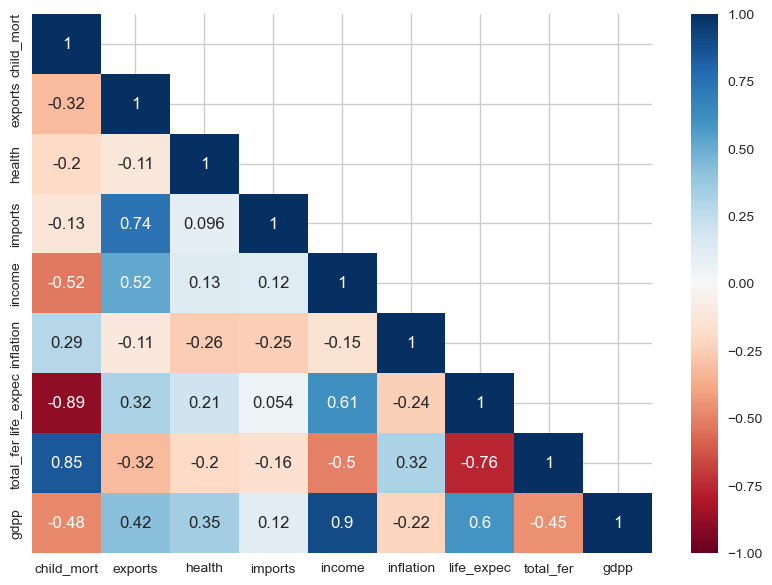

In [95]:
# make a heat map to identify any significant relation 
plt.figure(figsize=(10,7))
sns.heatmap(data=data.corr(),annot=True,vmin=-1,vmax=1,cmap='RdBu',mask=np.triu(data.corr(),k=1))
plt.show()

**Inferences :**
1. Countries with higher life expectancies have sigficantly lower child mortality 
2. more the import in a country more the export
3. people living in countries with higher gdpp have higher incomes.
4. Higher income is contributing in lowering child mortality rate.

### Visualization

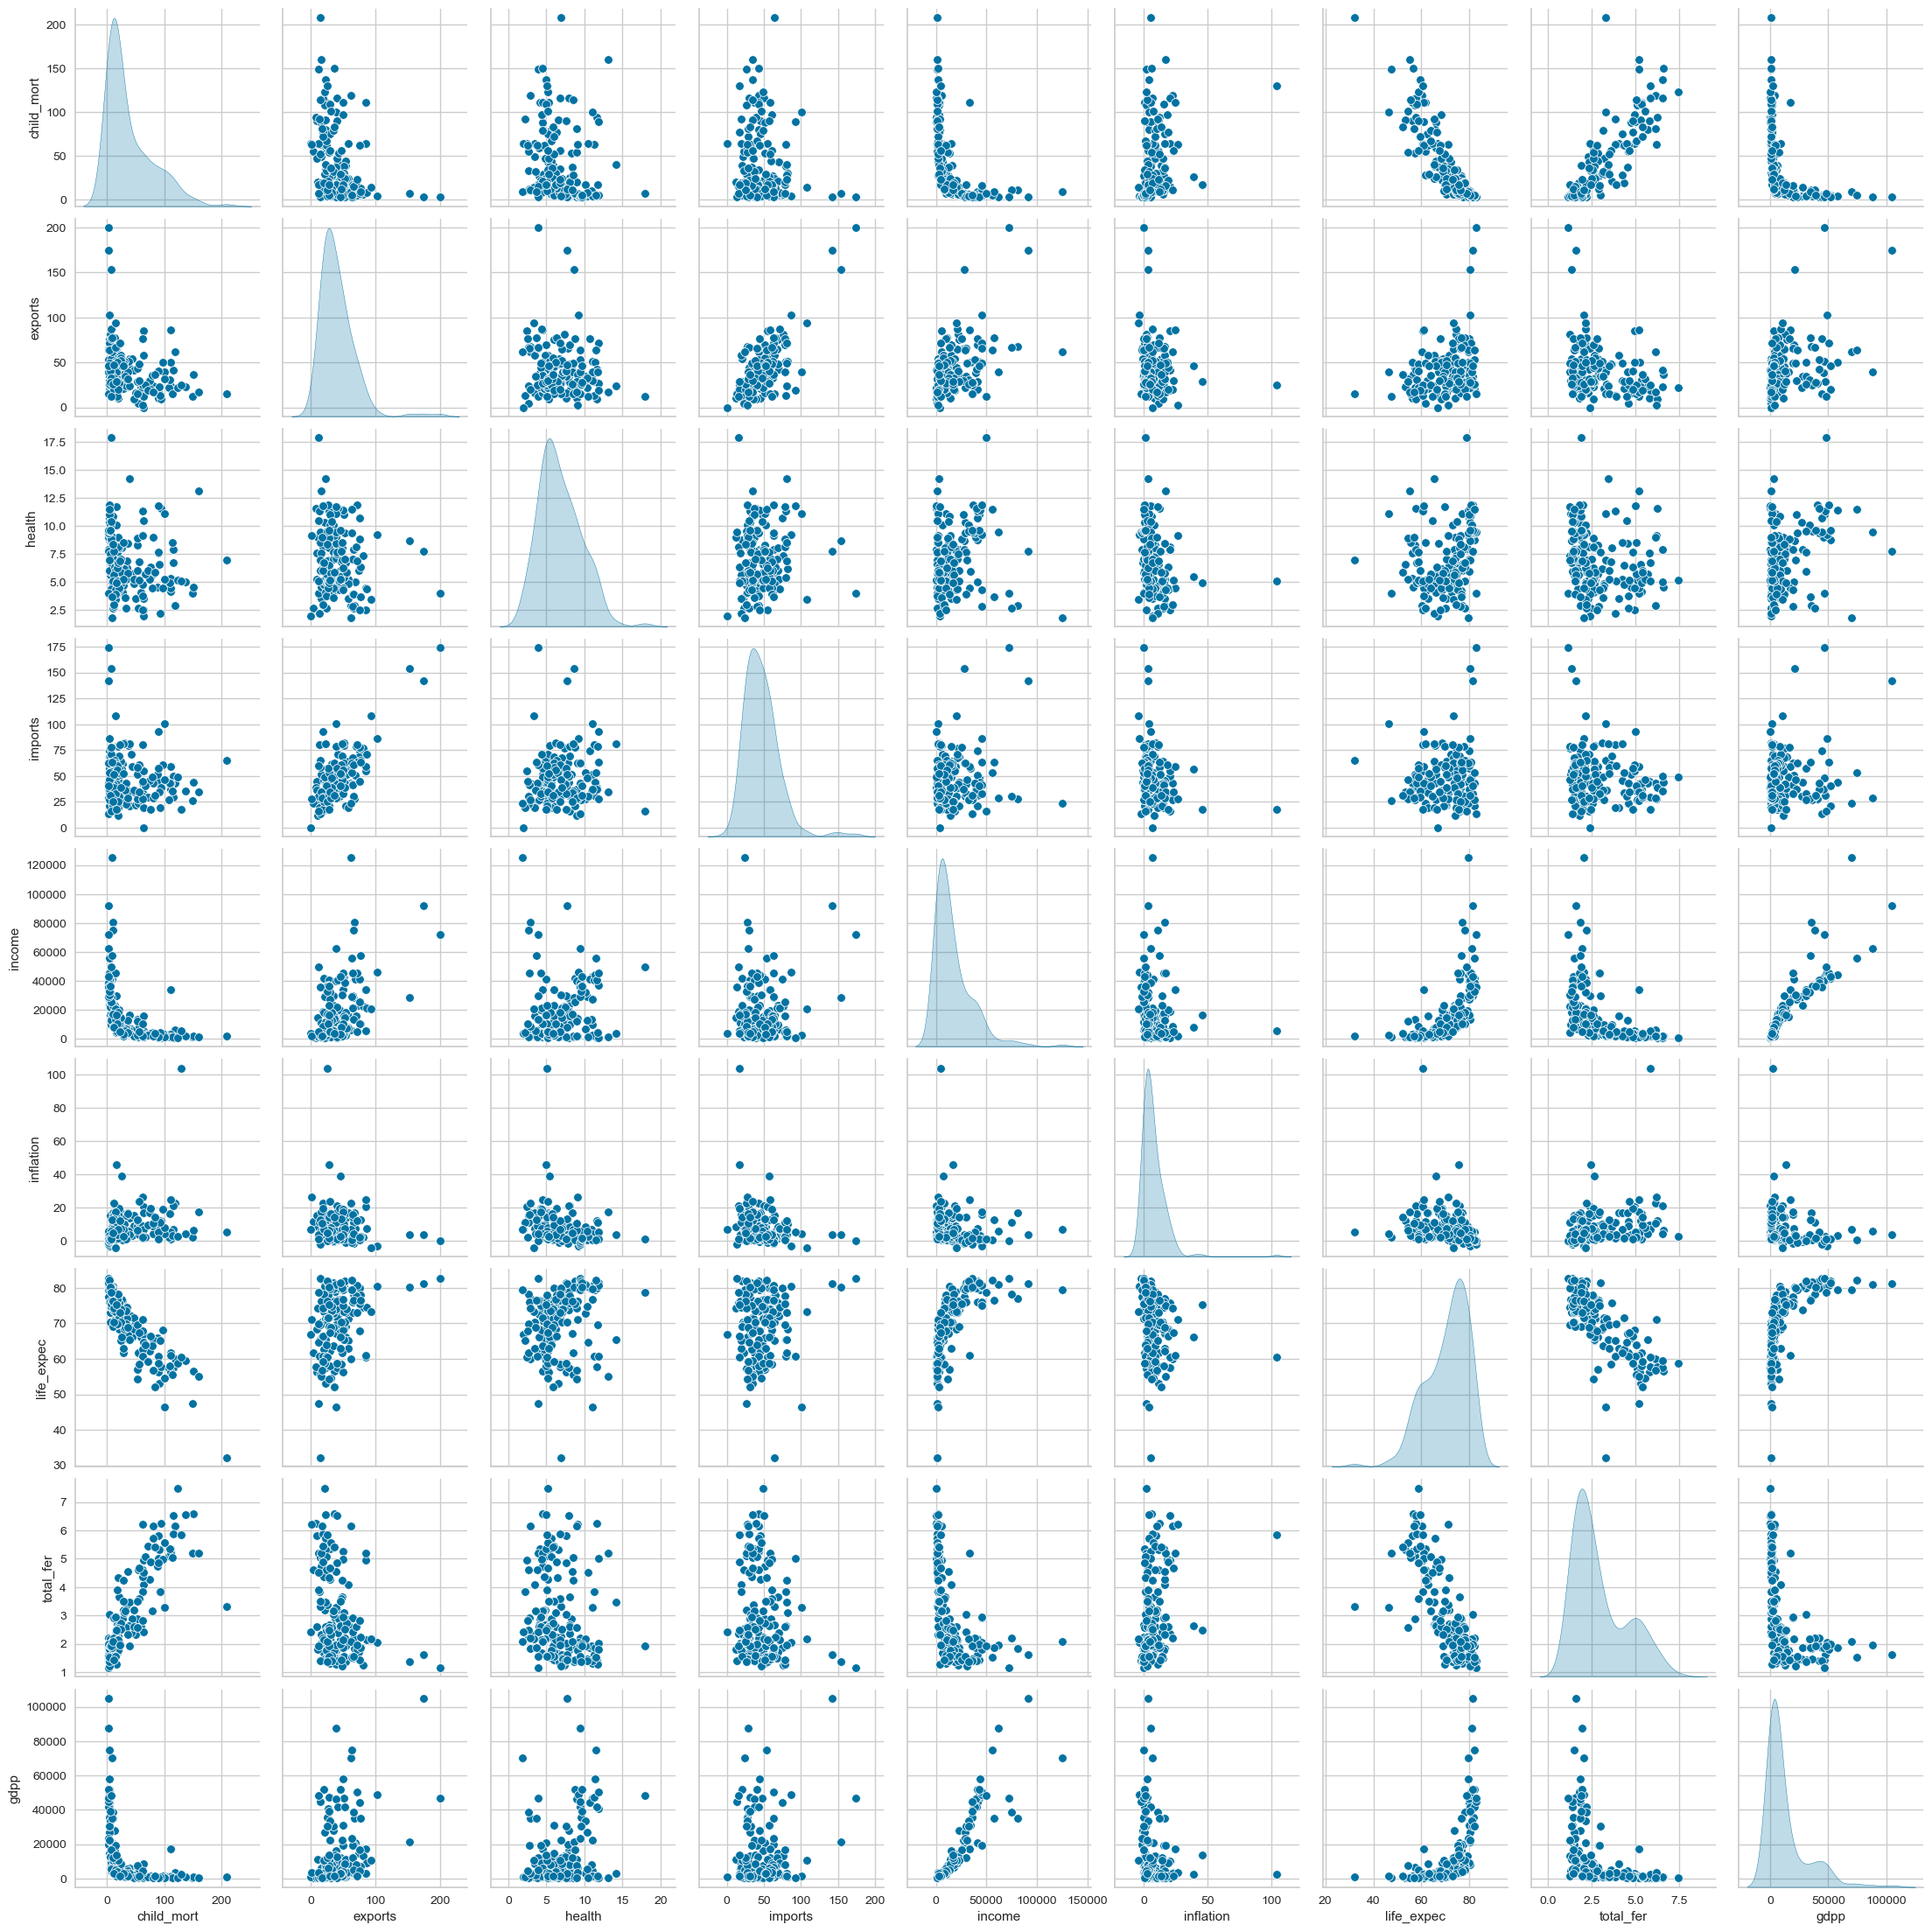

In [96]:
sns.pairplot(data,diag_kind='kde')
plt.show()

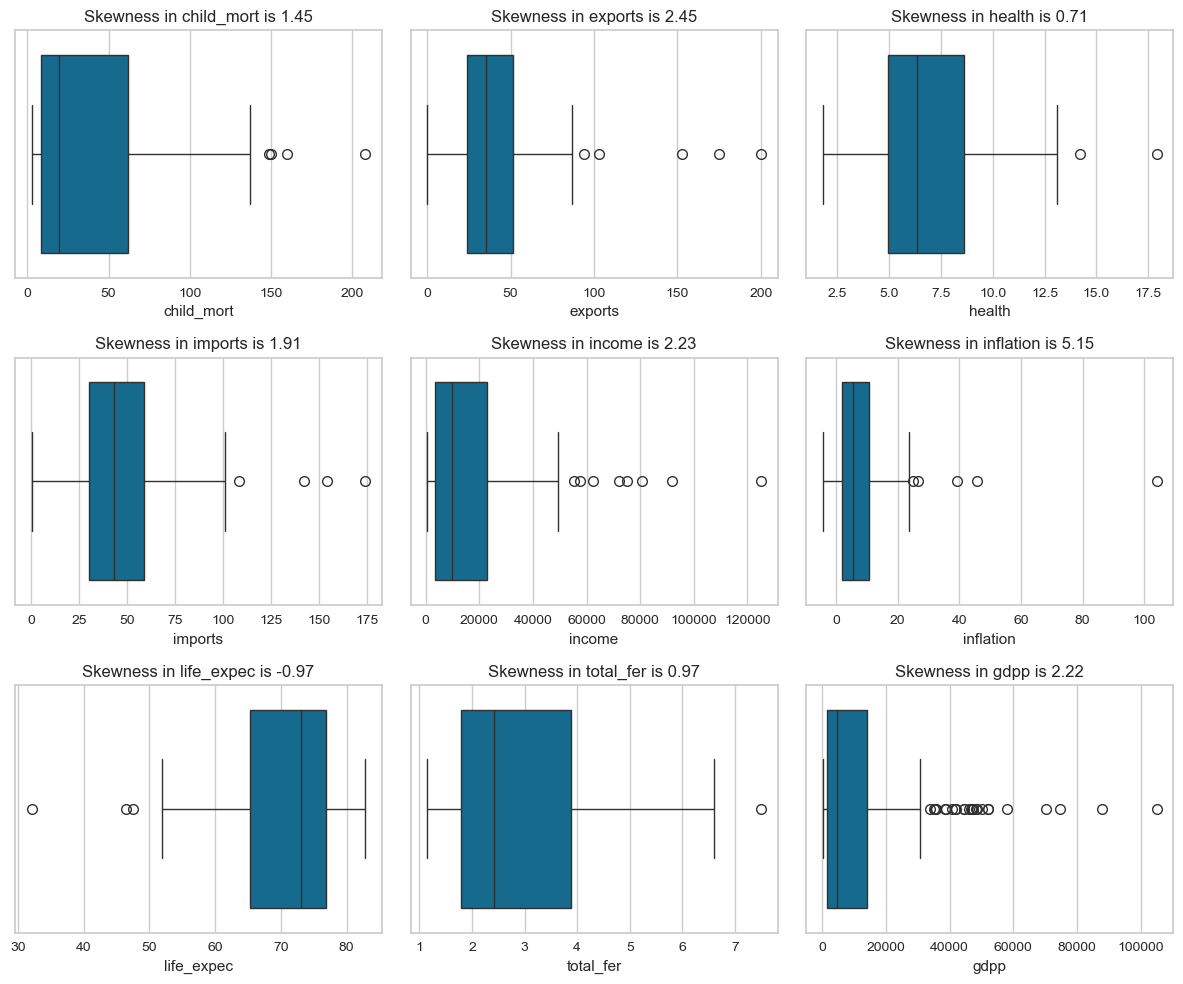

In [97]:
# expore the skewness and outliers using boxplot
t=1
plt.figure(figsize=(12,10))
for i in data.columns:
    plt.subplot(3,3,t)
    sns.boxplot(data=data,x=i)
    plt.title(f'Skewness in {i} is {round(data[i].skew(),2)}')
    t+=1
plt.tight_layout()
plt.show()

### Preprocessing

In [98]:
# check for missing values
data.isnull().sum()

child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

In [99]:
# duplicates
data.duplicated().sum()

0

In [100]:
# treat the outliers
# lets cap the outliers
for i in data.columns:
    q3,q1=np.quantile(data[i],[0.75,0.25])
    iqr=q3-q1
    ul,ll=q3+2*iqr,q1-2*iqr
    data[i]=data[i].apply(lambda x:ul if x>ul else ll if x<ll else x)

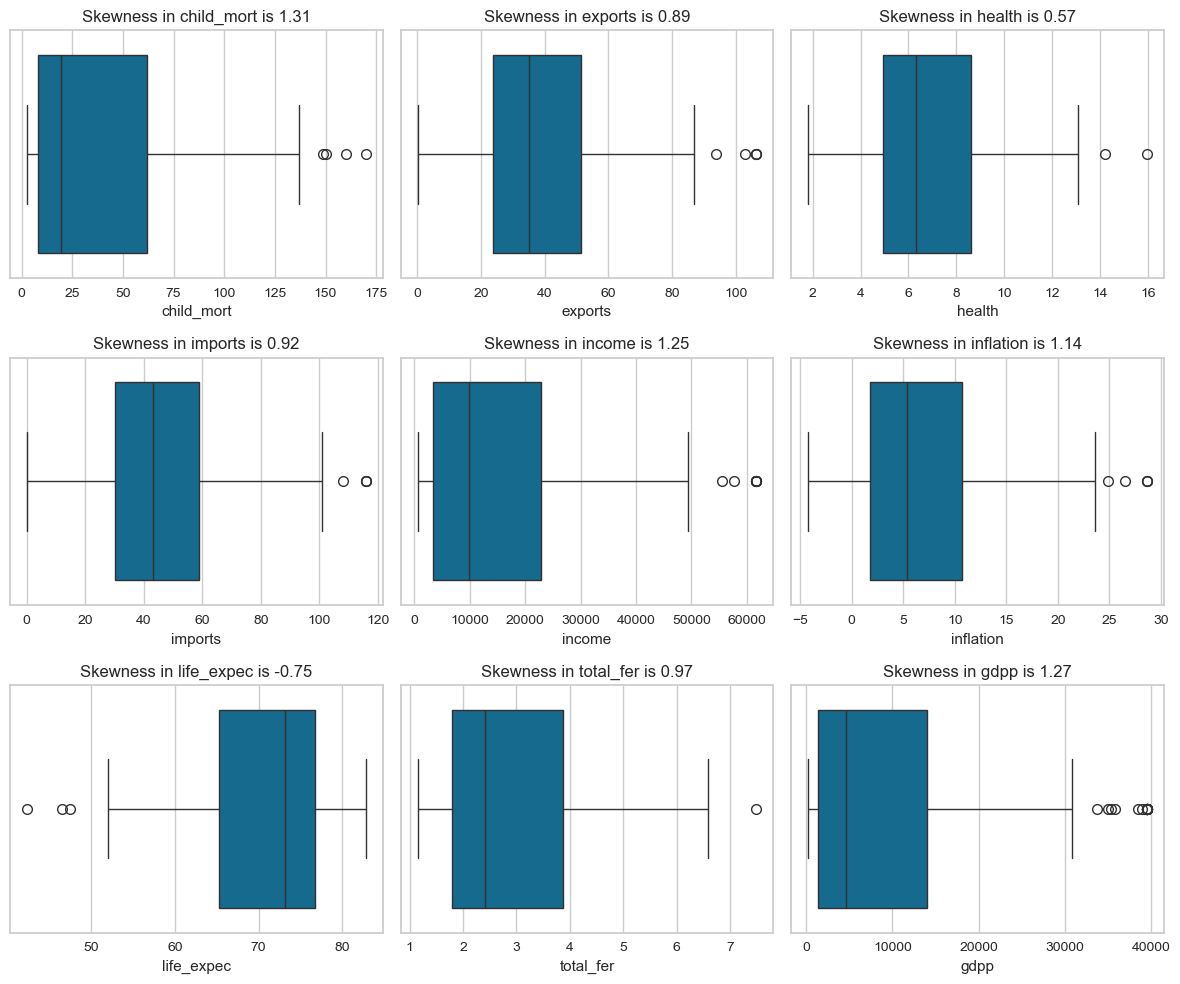

In [101]:
# expore the skewness and outliers using boxplot
t=1
plt.figure(figsize=(12,10))
for i in data.columns:
    plt.subplot(3,3,t)
    sns.boxplot(data=data,x=i)
    plt.title(f'Skewness in {i} is {round(data[i].skew(),2)}')
    t+=1
plt.tight_layout()
plt.show()

In [102]:
# scale the data
scaler=StandardScaler()
data_s=pd.DataFrame(scaler.fit_transform(data),columns=data.columns,index=data.index)
data_s.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
country,,,,,,,,,
Afghanistan,1.325807,-1.350898,0.287879,-0.059395,-0.908259,0.327015,-1.669872,1.902882,-0.800533
Albania,-0.545011,-0.536547,-0.094264,0.115438,-0.394747,-0.384140,0.658280,-0.859973,-0.534220
Algeria,-0.273031,-0.066034,-0.977272,-0.697302,-0.211439,1.283842,0.681446,-0.038404,-0.506362
Angola,2.057866,1.015243,-1.467008,-0.153900,-0.643479,2.188949,-1.218141,2.128151,-0.576385
Antigua and Barbuda,-0.705149,0.255182,-0.287190,0.602137,0.171226,-0.822326,0.716194,-0.541946,0.076410


### Reduce the data using PCA

In [103]:
pca=PCA(n_components=9)
pca.fit(data_s)

PCA(n_components=9)

In [104]:
# lets see how many pcs we have
# as per kaiser criterion we can have 3 PC's
pca.explained_variance_ratio_

array([0.48163025, 0.16586924, 0.13639048, 0.09910154, 0.0655671 ,
       0.02171641, 0.0164242 , 0.0094028 , 0.00389797])

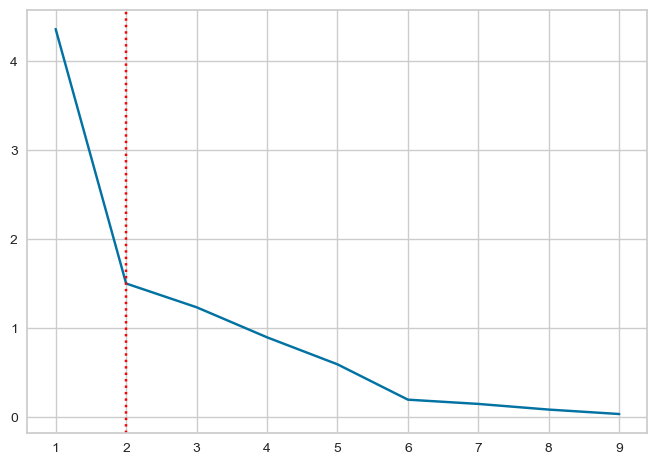

In [105]:
# lets see Scree plot
plt.plot(range(1,10),pca.explained_variance_)
plt.axvline(x=2,color='red',ls=':')
plt.show()

In [106]:
# explained variance percentages 
# lets use PCS that explained 95% variance
pca.explained_variance_ratio_.cumsum()

array([0.48163025, 0.6474995 , 0.78388998, 0.88299152, 0.94855862,
       0.97027503, 0.98669923, 0.99610203, 1.        ])

lets go with 5 PCs as they can explain ~95% variance in data

In [107]:
pca_final=PCA(n_components=5)
pca_data=pd.DataFrame(pca_final.fit_transform(data_s),columns=range(1,6))

In [108]:
pca_data.head()

,1,2,3,4,5
0,-3.099217,-0.232689,0.972447,0.787536,-0.009905
1,0.427427,-0.285346,0.242571,-1.377388,0.114011
2,-0.411658,-0.526613,-1.634043,-0.613283,0.459962
3,-3.217072,1.229145,-1.983955,1.635771,0.159702
4,1.189011,0.479460,0.151955,-0.774114,-0.382475


## K-Means Clustering

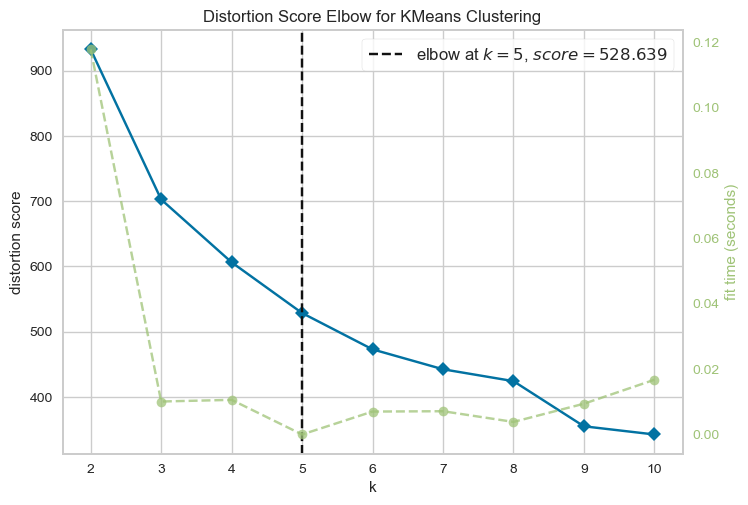

In [109]:
# lets decide the value of K

# K-elbow plot
kelbow=kelbow_visualizer(model=KMeans(),k=10,X=pca_data)

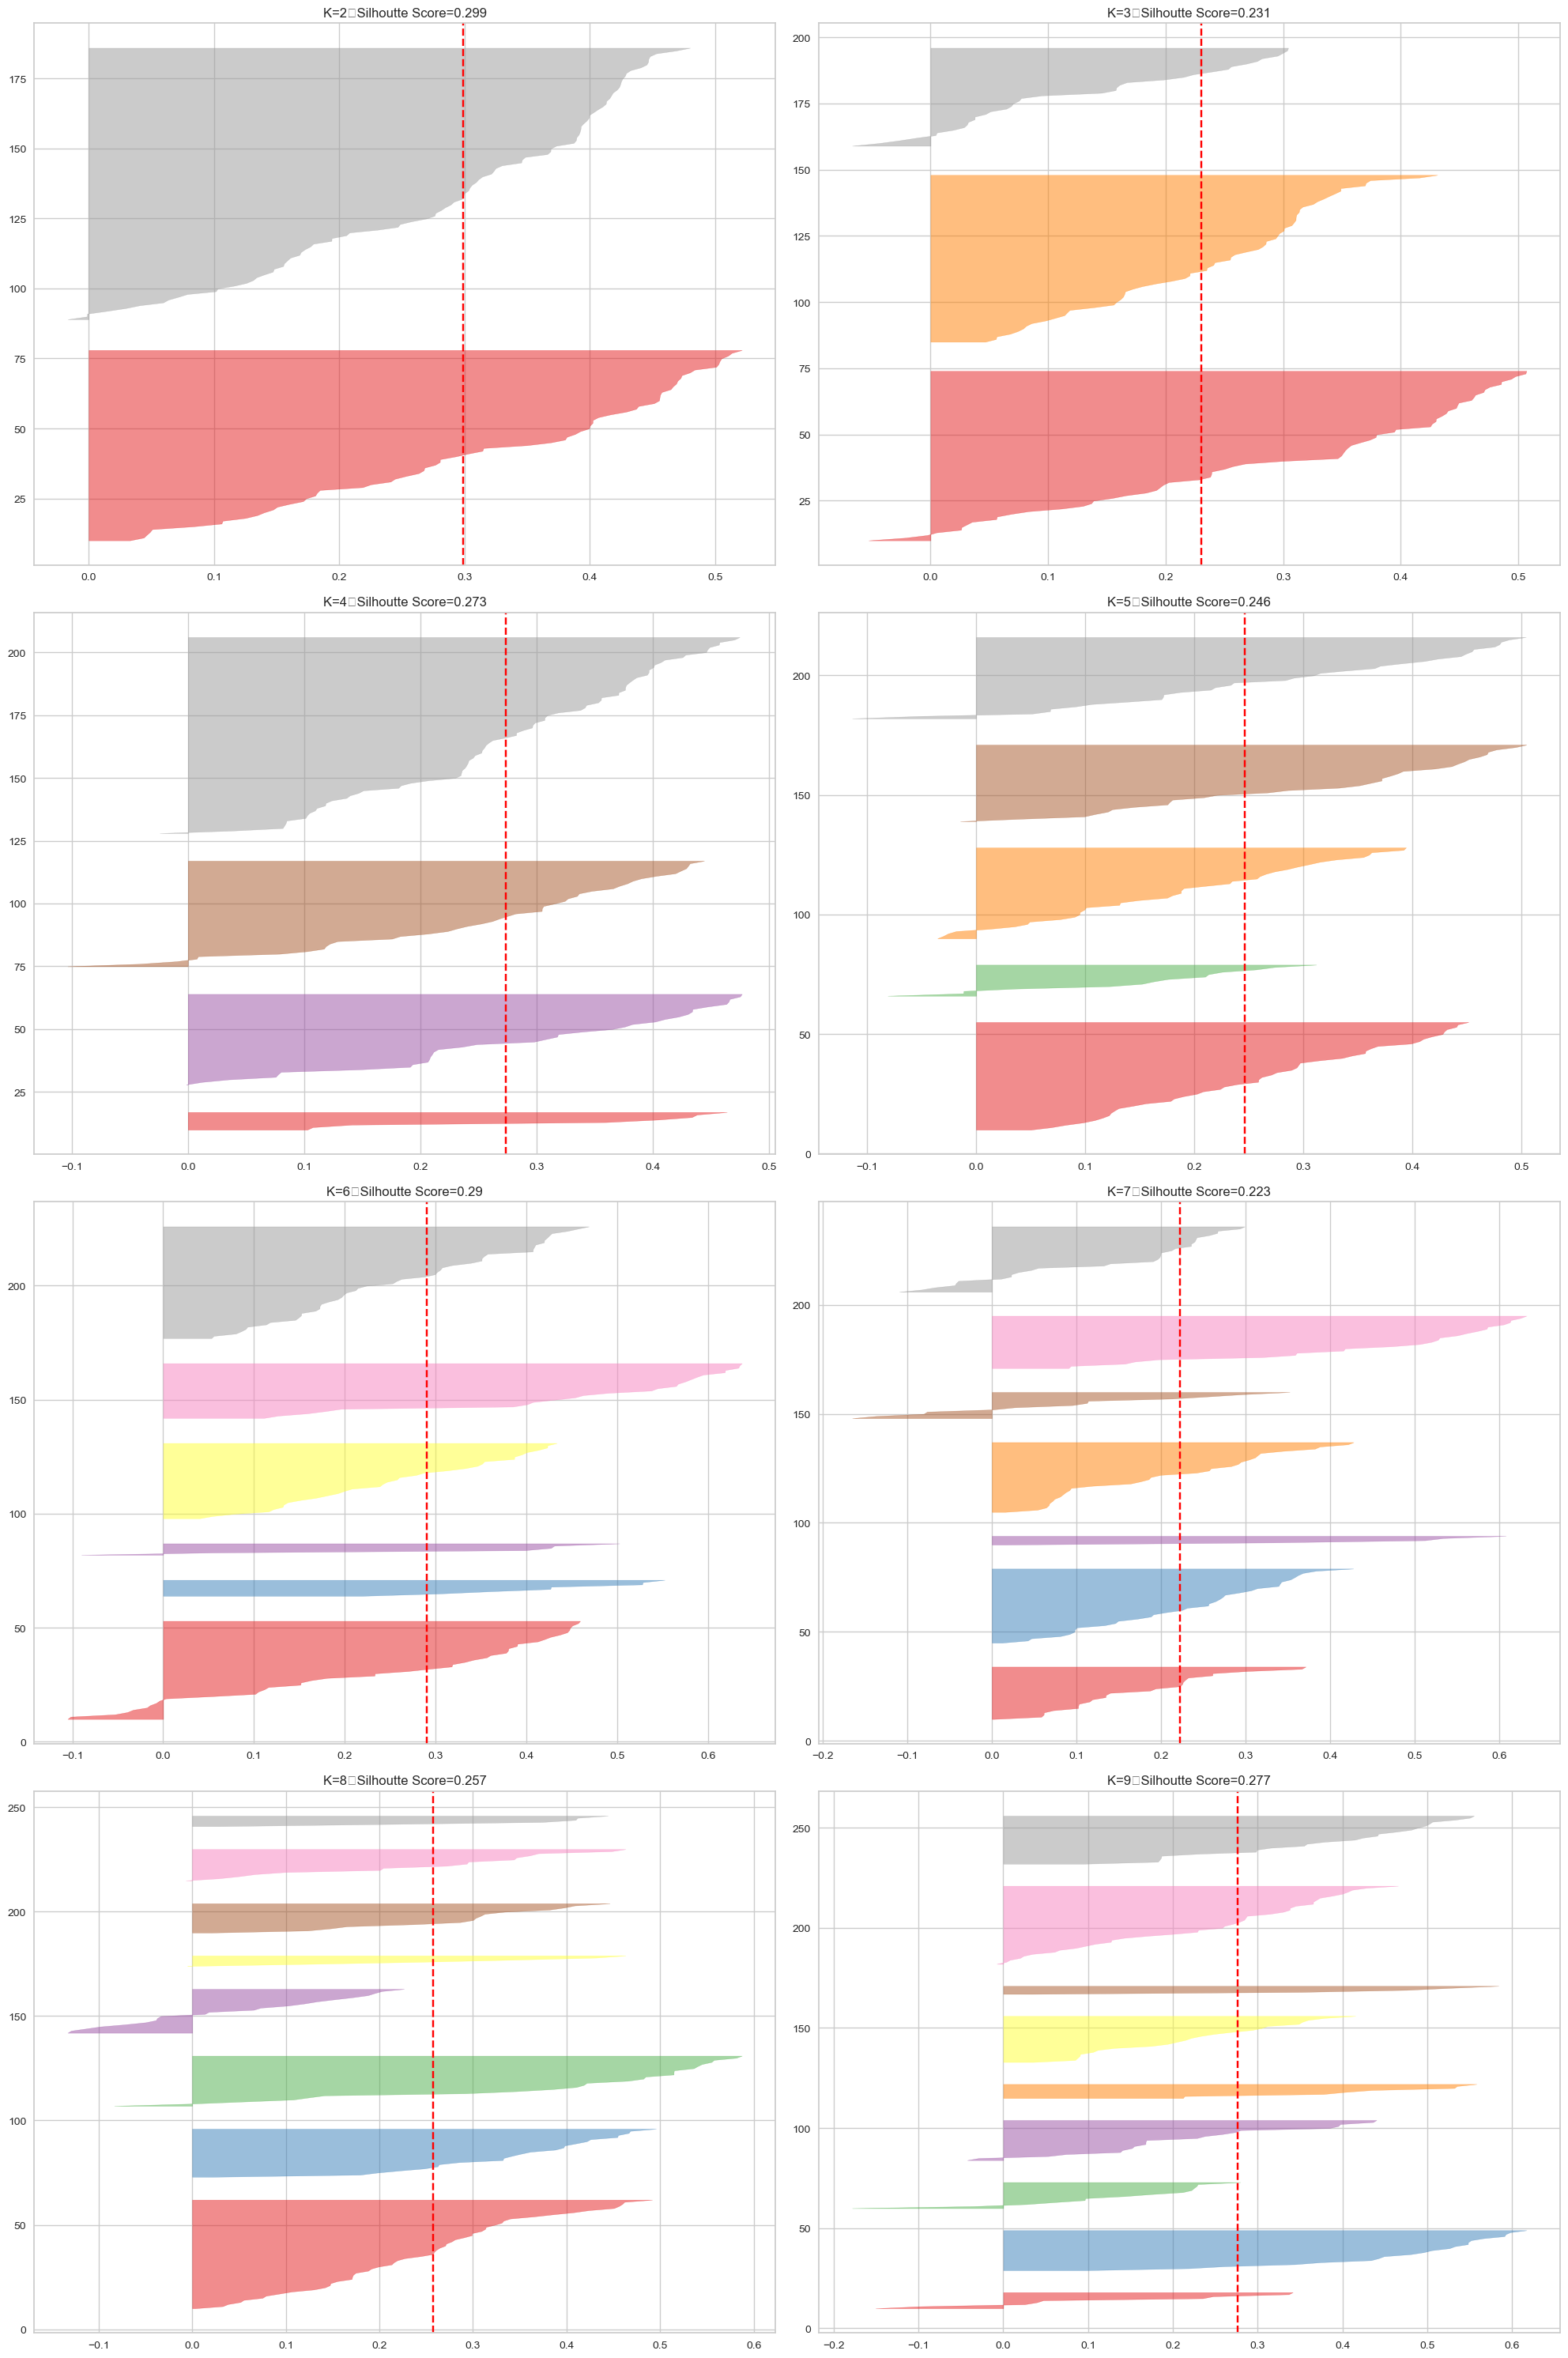

In [110]:
# silhoutte visulaizer
t=1
plt.figure(figsize=(20,30))
for i in range(2,10):
    plt.subplot(4,2,t)
    model=KMeans(n_clusters=i)
    sil_viz=SilhouetteVisualizer(estimator=model)
    sil_viz.fit(pca_data)
    plt.title(f'K={i}\tSilhoutte Score={round(sil_viz.silhouette_score_,3)}')
    t+=1
plt.tight_layout()
plt.show()

K=2 and K=3 are giving better clusters. But silhuoette score is slightly better in K=3 also the clusters that are formed heve fairly good dietribution. Lets go with K=3 

In [138]:
model_kmeans=KMeans(n_clusters=3,random_state=2)
labels=model_kmeans.fit_predict(pca_data)
data['Labels']=labels

In [139]:
data.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Labels
country,,,,,,,,,,
Afghanistan,90.2,10.0,7.58,44.9,1610.0,9.44,56.2,5.82,553.0,0
Albania,16.6,28.0,6.55,48.6,9930.0,4.49,76.3,1.65,4090.0,2
Algeria,27.3,38.4,4.17,31.4,12900.0,16.10,76.5,2.89,4460.0,2
Angola,119.0,62.3,2.85,42.9,5900.0,22.40,60.1,6.16,3530.0,0
Antigua and Barbuda,10.3,45.5,6.03,58.9,19100.0,1.44,76.8,2.13,12200.0,2


In [140]:
data.groupby(by='Labels').mean().T

Labels,0,1,2
child_mort,91.570833,5.237838,21.508537
exports,28.546229,52.458108,40.797317
health,6.296458,8.730541,6.231951
imports,41.443040,47.971622,48.097561
income,3937.770833,41360.540541,12281.097561
inflation,10.345729,2.588432,7.365720
life_expec,59.558333,79.956757,72.875610
total_fer,4.953958,1.755676,2.311707
gdpp,1902.916667,34073.243243,6291.146341


In [141]:
data['Labels']=data['Labels'].map({0:'UnderDeveloped',1:'Developed',2:'Developing'})

In [142]:
data

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Labels
country,,,,,,,,,,
Afghanistan,90.2,10.0,7.58,44.9,1610.0,9.44,56.2,5.82,553.0,UnderDeveloped
Albania,16.6,28.0,6.55,48.6,9930.0,4.49,76.3,1.65,4090.0,Developing
Algeria,27.3,38.4,4.17,31.4,12900.0,16.10,76.5,2.89,4460.0,Developing
Angola,119.0,62.3,2.85,42.9,5900.0,22.40,60.1,6.16,3530.0,UnderDeveloped
Antigua and Barbuda,10.3,45.5,6.03,58.9,19100.0,1.44,76.8,2.13,12200.0,Developing
...,...,...,...,...,...,...,...,...,...,...
Vanuatu,29.2,46.6,5.25,52.7,2950.0,2.62,63.0,3.50,2970.0,Developing
Venezuela,17.1,28.5,4.91,17.6,16500.0,28.63,75.4,2.47,13500.0,Developing
Vietnam,23.3,72.0,6.84,80.2,4490.0,12.10,73.1,1.95,1310.0,Developing


In [145]:
# Lets see the developed countries
data[data['Labels']=='Developed'].index.to_list()

['Australia',
 'Austria',
 'Bahamas',
 'Bahrain',
 'Belgium',
 'Brunei',
 'Canada',
 'Cyprus',
 'Czech Republic',
 'Denmark',
 'Finland',
 'France',
 'Germany',
 'Greece',
 'Iceland',
 'Ireland',
 'Israel',
 'Italy',
 'Japan',
 'Kuwait',
 'Luxembourg',
 'Malta',
 'Netherlands',
 'New Zealand',
 'Norway',
 'Portugal',
 'Qatar',
 'Singapore',
 'Slovak Republic',
 'Slovenia',
 'South Korea',
 'Spain',
 'Sweden',
 'Switzerland',
 'United Arab Emirates',
 'United Kingdom',
 'United States']

In [136]:
# Lets see the developing countries
data[data['Labels']=='Developing'].index.to_list()

['Afghanistan',
 'Angola',
 'Benin',
 'Botswana',
 'Burkina Faso',
 'Burundi',
 'Cameroon',
 'Central African Republic',
 'Chad',
 'Comoros',
 'Congo, Dem. Rep.',
 'Congo, Rep.',
 "Cote d'Ivoire",
 'Equatorial Guinea',
 'Eritrea',
 'Gabon',
 'Gambia',
 'Ghana',
 'Guinea',
 'Guinea-Bissau',
 'Haiti',
 'Iraq',
 'Kenya',
 'Kiribati',
 'Lao',
 'Lesotho',
 'Liberia',
 'Madagascar',
 'Malawi',
 'Mali',
 'Mauritania',
 'Mozambique',
 'Myanmar',
 'Namibia',
 'Niger',
 'Nigeria',
 'Pakistan',
 'Rwanda',
 'Senegal',
 'Sierra Leone',
 'South Africa',
 'Sudan',
 'Tanzania',
 'Timor-Leste',
 'Togo',
 'Uganda',
 'Yemen',
 'Zambia']

In [144]:
# Lets see the under developed countries
data[data['Labels']=='UnderDeveloped'].index.to_list()

['Afghanistan',
 'Angola',
 'Benin',
 'Botswana',
 'Burkina Faso',
 'Burundi',
 'Cameroon',
 'Central African Republic',
 'Chad',
 'Comoros',
 'Congo, Dem. Rep.',
 'Congo, Rep.',
 "Cote d'Ivoire",
 'Equatorial Guinea',
 'Eritrea',
 'Gabon',
 'Gambia',
 'Ghana',
 'Guinea',
 'Guinea-Bissau',
 'Haiti',
 'Iraq',
 'Kenya',
 'Kiribati',
 'Lao',
 'Lesotho',
 'Liberia',
 'Madagascar',
 'Malawi',
 'Mali',
 'Mauritania',
 'Mozambique',
 'Myanmar',
 'Namibia',
 'Niger',
 'Nigeria',
 'Pakistan',
 'Rwanda',
 'Senegal',
 'Sierra Leone',
 'South Africa',
 'Sudan',
 'Tanzania',
 'Timor-Leste',
 'Togo',
 'Uganda',
 'Yemen',
 'Zambia']

In [147]:
centroids=model_kmeans.cluster_centers_

In [148]:
centroids

array([[-2.5308199 ,  0.10840405,  0.20904521,  0.63748954, -0.14282851],
       [ 2.86681026, -0.35670063,  0.14254351,  0.83051233, -0.23432848],
       [ 0.18789482,  0.09749425, -0.18668634, -0.74790798,  0.18934052]])

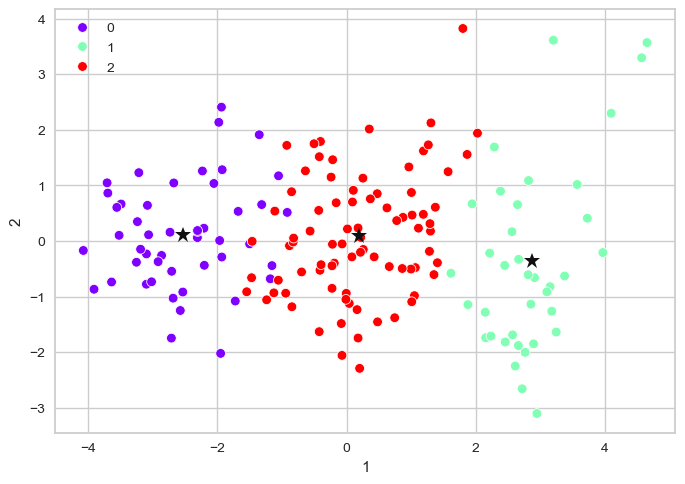

In [152]:
sns.scatterplot(data=pca_data,x=1,y=2,hue=labels,palette='rainbow')
for i in range(0,3):
    plt.plot(centroids[i][0],centroids[i][1],color='k',marker='*',ms=12)

plt.show()

### Business Interpretation

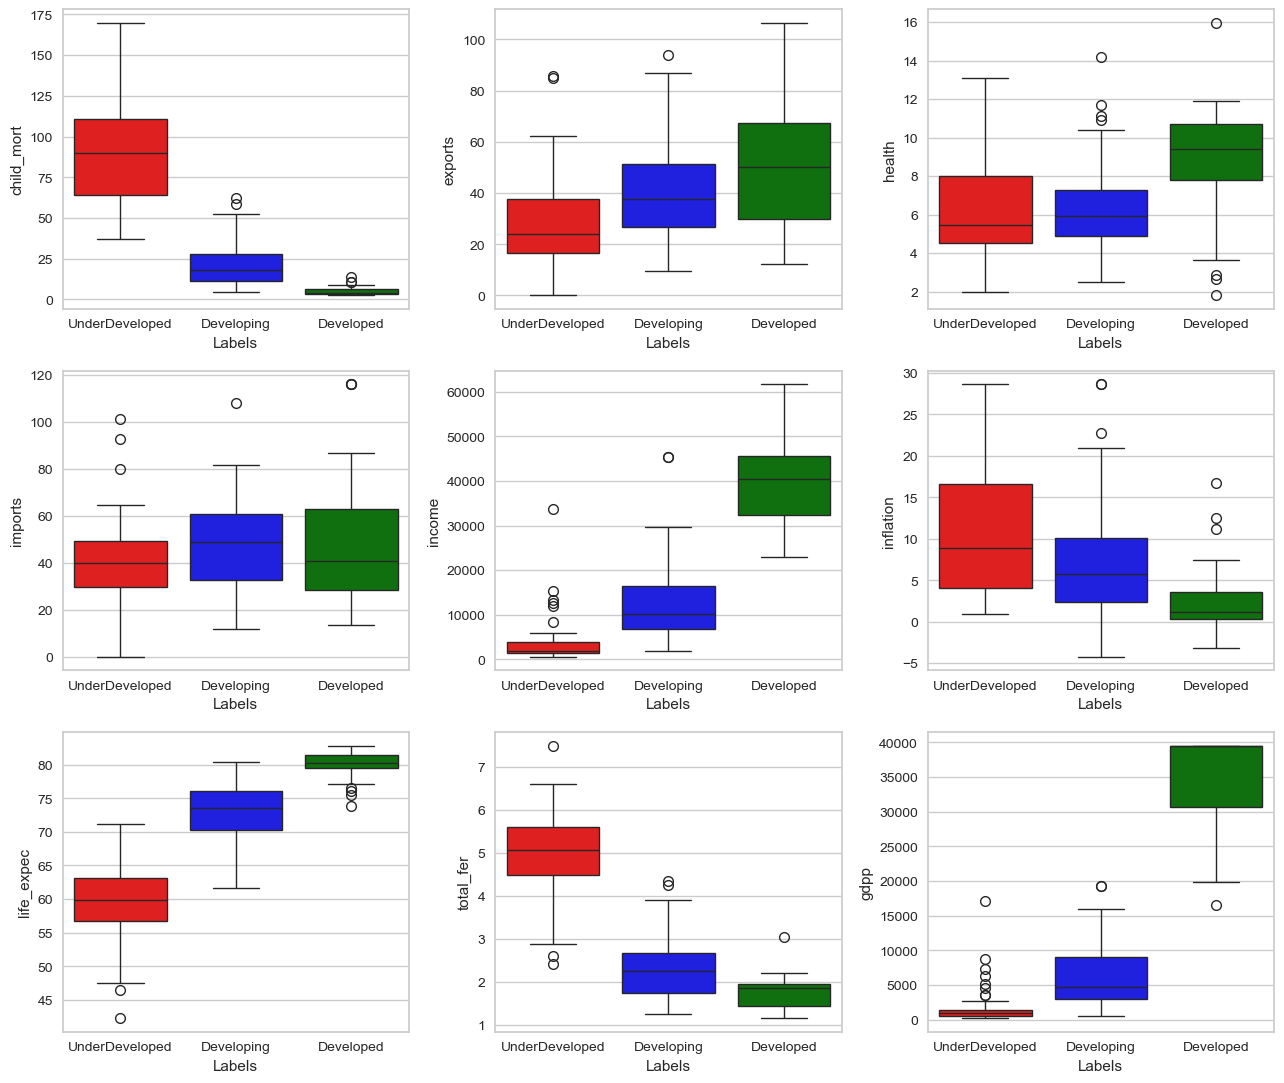

In [158]:
t=1
plt.figure(figsize=(13,11))
for i in data:
    if i!='Labels':
        plt.subplot(3,3,t)
        sns.boxplot(data=data,y=i,x='Labels',palette=['red','blue','green'])
    t+=1
plt.tight_layout()
plt.show()

In [165]:
# world map using coropleth
px.choropleth(data_frame=data,locationmode='country names',locations=data.index,color='Labels',\
              color_discrete_map={'Developed':'lightgreen',
                                  'Developing':'lightblue',
                                  'UnderDeveloped':'orange'})

## Development

In [166]:
# inorder to predict
pca_data.head()

,1,2,3,4,5
0,-3.099217,-0.232689,0.972447,0.787536,-0.009905
1,0.427427,-0.285346,0.242571,-1.377388,0.114011
2,-0.411658,-0.526613,-1.634043,-0.613283,0.459962
3,-3.217072,1.229145,-1.983955,1.635771,0.159702
4,1.189011,0.479460,0.151955,-0.774114,-0.382475


In [167]:
model_kmeans.predict([[0.427427,-0.285346,-242571,-1.377388,0.114011]])

array([2])

In [171]:
model_kmeans.predict([[0.427427,-0.285346,-242571,-1.377388,0.114011]])[0]

2

In [168]:
# lets download the instances that we require to deploy
import pickle

In [169]:
pca_final

PCA(n_components=5)

In [170]:
with open('scaler.pkl','wb') as file:
    pickle.dump(scaler,file)

with open('pca.pkl','wb') as file:
    pickle.dump(pca_final,file)

with open('model.pkl','wb') as file:
    pickle.dump(model_kmeans,file)